# LOGISTIC REGRESSION

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [65]:
#READING THE  TRAIN DATA
df_train=pd.read_csv('Titanic_train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [66]:
#READING THE TEST DATA
df_test=pd.read_csv('Titanic_test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Basic statistics of train

In [67]:
#Check the type of the DataFrame
print(type(df_train))

#Check the shape of the DataFrame
print(df_train.shape)

#Print the columns of the DataFrame
print(df_train.columns)

#Check for missing values and their sum
print(df_train.isnull().sum())

#Get some basic information about the DataFrame
print(df_train.info())

#Describe the basic statistics of the DataFrame
print(df_train.describe())
#shape
df_train.shape

<class 'pandas.core.frame.DataFrame'>
(891, 12)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null   

(891, 12)

# Basic statistics of test

In [68]:
#Similarly for the other DataFrame 'df_test                        '
print(type(df_test))
print(df_test.shape)
print(df_test.columns)
print(df_test.isnull().sum())
print(df_test.info())
print(df_test.describe())
df_test.shape


<class 'pandas.core.frame.DataFrame'>
(418, 11)
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 n

(418, 11)

In [69]:
# defined a new coloumn called as code 1,2 to determin train and test data
df_train["code"] = 1
df_test["code"] =2

In [70]:
# merging the two data fils in one place
data = pd.concat([df_train,df_test])

In [71]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,code
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


# Basic statistics of data

In [72]:
#Check the type of the dataFrame
print(type(data))

#Check the shape of the DataFrame
print(data.shape)

#Print the columns of the DataFrame
print(data.columns)

#Check for missing values and their sum
print(data.isnull().sum())

#Get some basic information about the DataFrame
print(data.info())

#Describe the basic statistics of the DataFrame
print(data.describe())

#shape
data.shape

<class 'pandas.core.frame.DataFrame'>
(1309, 13)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'code'],
      dtype='object')
PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
code              0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int6

(1309, 13)

In [73]:
#train=1, test=2
print(data["code"].value_counts())


code
1    891
2    418
Name: count, dtype: int64


In [74]:
data.isnull().sum() #null values IN EACH COLUMN

,0
PassengerId,0
Survived,418
Pclass,0
Name,0
Sex,0
Age,263
SibSp,0
Parch,0
Ticket,0
Fare,1


DATA CLEANING

In [75]:
# Encode categorical features using one-hot encoding
data = pd.get_dummies(data, columns=['Sex'], drop_first=True)
data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,code,Sex_male
0,1,0.0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1,True
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,False
2,3,1.0,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,False
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,False
4,5,0.0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1,True


In [76]:
# % OF NULL VALUES IN Age COLUMN
data['Age'].isna().sum()/len(data['Age'])*100

20.091673032849503

In [77]:
# % OF NULL VALUES IN Fare COLUMN
data['Fare'].isna().sum()/len(data['Fare'])*100

0.07639419404125286

In [78]:
# % OF NULL VALUES IN Cabin COLUMN
data['Cabin'].isna().sum()/len(data['Cabin'])*100

77.46371275783041

In [79]:
# % OF NULL VALUES IN Cabin COLUMN
data['Embarked'].isna().sum()/len(data['Embarked'])*100

0.15278838808250572

In [80]:
#Filling nan values with median
data['Age'].fillna(data['Age'].median(),inplace=True)
data['Fare'].fillna(data['Fare'].median(),inplace=True)
data['Survived'].fillna(data['Survived'].median(),inplace=True)
#filling Embarked with mode value
data['Embarked'].fillna(data['Embarked'].mode(),inplace=True)


In [81]:
# since 77% of data blank so dropping it
#drop cabin column
data.drop('Cabin',axis=1,inplace=True)

In [82]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,2


## summary of statistics

In [83]:
data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,code,Sex_male
0,1,0.0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,1,True
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,1,False
2,3,1.0,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,1,False
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,1,False
4,5,0.0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,1,True


In [84]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,code
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,0.261268,2.294882,29.503186,0.498854,0.385027,33.281086,1.319328
std,378.020061,0.439494,0.837836,12.905241,1.041658,0.865560,51.741500,0.466394
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,328.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,1.000000
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,982.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.275000,2.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,2.000000


# visualizations

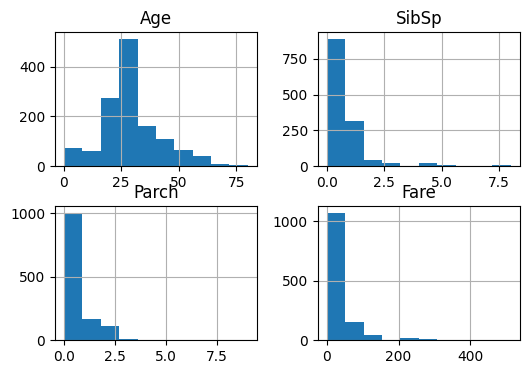

In [85]:
#Histogram for all numerical variables
#numerical_features = data.select_dtypes(include=['int64', 'float64'])
numerical_features = data[["Age","SibSp","Parch","Fare"]]
numerical_features.hist(figsize=(6, 4))
plt.show()

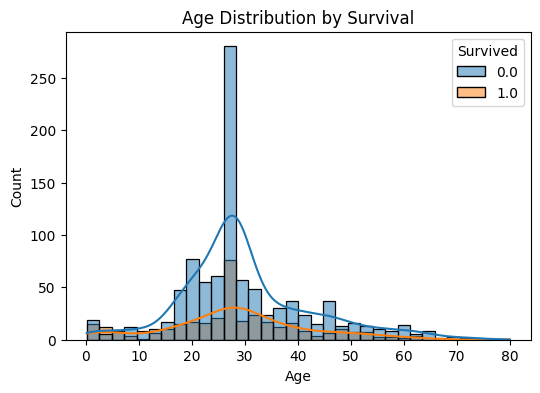

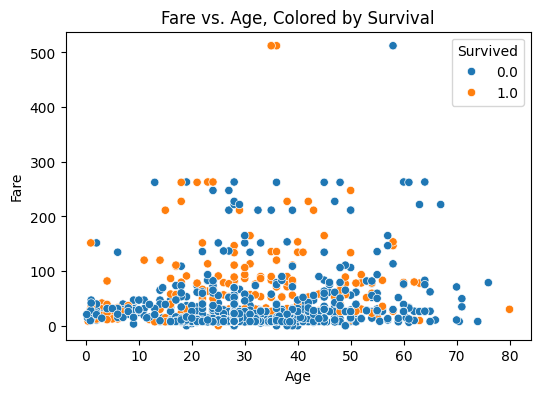

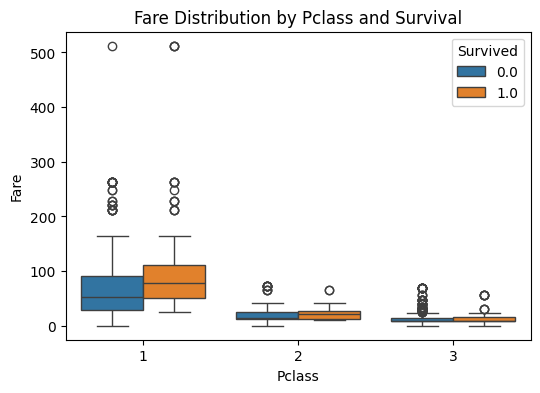

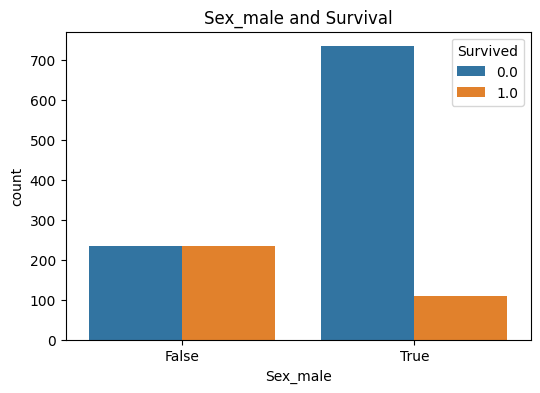

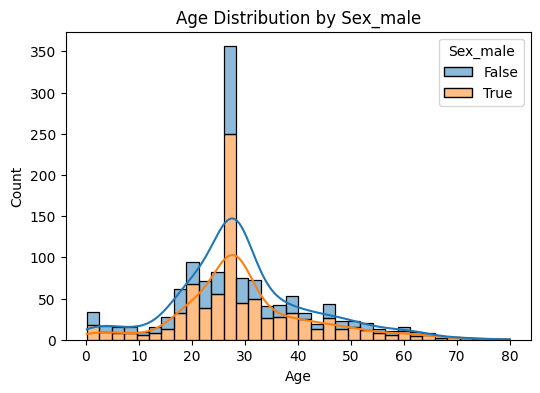

In [86]:
# Histogram of Age grouped by Survived
plt.figure(figsize=(6, 4))
sns.histplot(data=data, x='Age', hue='Survived', kde=True)
plt.title('Age Distribution by Survival')
plt.show()

# Scatter plot of Fare vs. Age, colored by Survived
plt.figure(figsize=(6, 4))
sns.scatterplot(data=data, x='Age', y='Fare', hue='Survived')
plt.title('Fare vs. Age, Colored by Survival')
plt.show()

# Box plot of Fare grouped by Pclass and Survived
plt.figure(figsize=(6, 4))
sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=data)
plt.title('Fare Distribution by Pclass and Survival')
plt.show()

# Count plot of Sex grouped by Survived
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex_male', hue='Survived', data=data)
plt.title('Sex_male and Survival')
plt.show()

# Analyze survival based on age and sex
plt.figure(figsize=(6, 4))
sns.histplot(data=data, x='Age', hue='Sex_male', kde=True, multiple="stack")
plt.title('Age Distribution by Sex_male')
plt.show()

# correlations

In [87]:
# Select only numerical features for correlation analysis
numerical_data = data.select_dtypes(include=np.number)
# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Display the correlation matrix
print(correlation_matrix)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.331493 -0.038354  0.025799 -0.055224  0.008942   
Survived       -0.331493  1.000000 -0.244686 -0.055862 -0.014375  0.054908   
Pclass         -0.038354 -0.244686  1.000000 -0.377908  0.060832  0.018322   
Age             0.025799 -0.055862 -0.377908  1.000000 -0.189972 -0.125851   
SibSp          -0.055224 -0.014375  0.060832 -0.189972  1.000000  0.373587   
Parch           0.008942  0.054908  0.018322 -0.125851  0.373587  1.000000   
Fare            0.031128  0.173786 -0.558683  0.178182  0.160349  0.221635   
code            0.807510 -0.407333 -0.023988  0.016026 -0.033867  0.005793   

                 Fare      code  
PassengerId  0.031128  0.807510  
Survived     0.173786 -0.407333  
Pclass      -0.558683 -0.023988  
Age          0.178182  0.016026  
SibSp        0.160349 -0.033867  
Parch        0.221635  0.005793  
Fare         1.000000  0.030398  
code         0.030398  1.

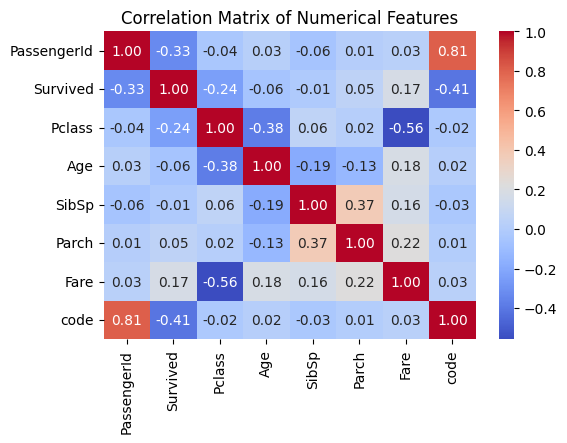

In [88]:
# visualize the correlation matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Model Building

In [89]:
#IMPORTING LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [90]:
# Split the data back into training and testing sets
train = data[data['code'] == 1]
test = data[data['code'] == 2]


In [91]:
# Drop unnecessary columns
x_train = train.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Embarked', 'code'], axis=1)
y_train = train['Survived']
x_test = test.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Embarked', 'code'], axis=1)


In [92]:
# Train the logistic regression model
lr.fit(x_train, y_train)


LogisticRegression()

In [93]:
# Make predictions on the test set
predictions = lr.predict(x_test)


In [94]:
# Print some of the predictions
print(predictions[:20])

[0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0.]


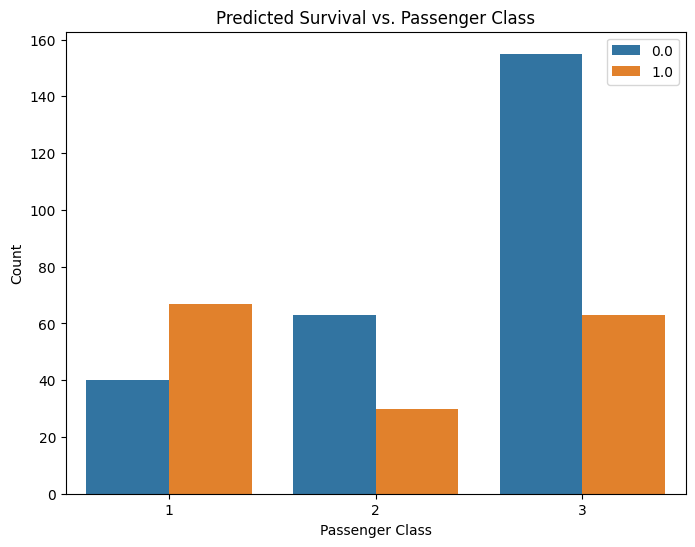

In [95]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue=predictions, data=x_test.reset_index()) #Resetting index to handle potential issues with indexing
plt.title('Predicted Survival vs. Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

# Model Evaluation:

In [96]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
y_test = train['Survived']  # Replace with the correct y_test data

In [97]:
# Confusion Matrix
cm = confusion_matrix(y_test, lr.predict(x_train))
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[466  83]
 [ 99 243]]


In [98]:
# Specificity
tn, fp, fn, tp = cm.ravel()  # Extract values from confusion matrix
specificity = tn / (tn + fp)
print(f"Specificity: {specificity}")

Specificity: 0.848816029143898


In [99]:
# Evaluate the model
accuracy = accuracy_score(y_test, lr.predict(x_train)) #use x_train to get y_pred for evaluating the model
precision = precision_score(y_test, lr.predict(x_train))
recall = recall_score(y_test, lr.predict(x_train))# Sensitivity = Recall
f1 = f1_score(y_test, lr.predict(x_train))
roc_auc = roc_auc_score(y_test, lr.predict_proba(x_train)[:, 1])


print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"ROC-AUC score: {roc_auc}")

Accuracy: 0.7957351290684624
Precision: 0.745398773006135
Recall: 0.7105263157894737
F1-score: 0.7275449101796407
ROC-AUC score: 0.854576103281884


In [100]:
#import roc_curve
from sklearn.metrics import roc_curve, auc

In [101]:
# Assuming 'y_test' and 'x_train' are defined as in your code
y_pred_prob = lr.predict_proba(x_train)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

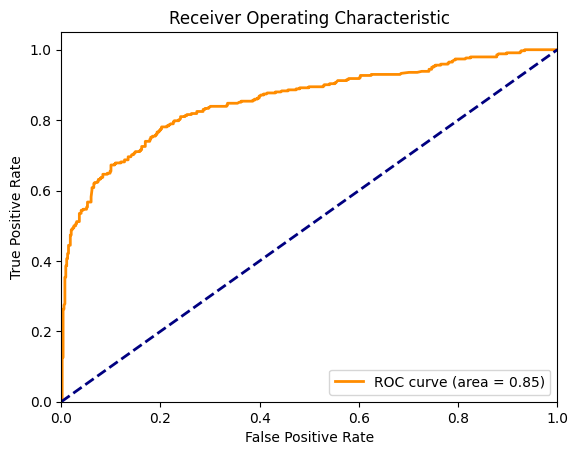

In [102]:
#ploting roc curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Interpretation

In [103]:
# Interpret the coefficients of the logistic regression
# Get the coefficients and feature names
coefficients = lr.coef_[0]
feature_names = x_train.columns

In [104]:
# Create a DataFrame for better visualization
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

In [105]:
# Sort by absolute coefficient value for easier interpretation
coefficients_df = coefficients_df.reindex(coefficients_df['Coefficient'].abs().sort_values(ascending=False).index)

coefficients_df

,Feature,Coefficient
5,Sex_male,-2.650407
0,Pclass,-1.051485
2,SibSp,-0.336841
3,Parch,-0.095973
1,Age,-0.038515
4,Fare,0.003011


Interview Questions:

In [106]:
# 1. What is the difference between precision and recall?

'''Precision : Out of all the positive predictions made by the model, how many are actually positive.

Formula:
Precision = (True Positives) / (True Positives + False Positives)

Recall: Out of all the actual positive instances, how many were correctly predicted by the model.

Formula:
Recall = (True Positives) / (True Positives + False Negatives)'''

'Precision : Out of all the positive predictions made by the model, how many are actually positive.\n\nFormula:  \nPrecision = (True Positives) / (True Positives + False Positives)\n\nRecall: Out of all the actual positive instances, how many were correctly predicted by the model.\n\nFormula:  \nRecall = (True Positives) / (True Positives + False Negatives)'

In [107]:
#2. What is cross-validation, and why is it important in binary classification?
'''Cross-validationis a technique used to evaluate a model's performance by splitting the data into multiple subsets (folds), training and testing the model on different combinations of these subsets. It helps ensure the model generalizes well and prevents overfitting.

 Importance in Binary Classification:

Prevents overfitting** by training on different data subsets.
Provides a more reliable performance estimate** than a single train-test split.
Maximizes data usage**, especially with limited data.'''

"Cross-validationis a technique used to evaluate a model's performance by splitting the data into multiple subsets (folds), training and testing the model on different combinations of these subsets. It helps ensure the model generalizes well and prevents overfitting.\n\n Importance in Binary Classification: \n\nPrevents overfitting** by training on different data subsets.\nProvides a more reliable performance estimate** than a single train-test split.\nMaximizes data usage**, especially with limited data."